<ipython-input-20-cc3775e5dd22>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataset.x = dataset[["income", "age", "loan"]]
<ipython-input-20-cc3775e5dd22>:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataset.y = dataset.default


   clientid        income        age         loan       LTI  default
0         1  66155.925095  59.017015  8106.532131  0.122537        0
1         2  34415.153966  48.117153  6564.745018  0.190752        0
2         3  57317.170063  63.108049  8020.953296  0.139940        0
3         4  42709.534201  45.751972  6103.642260  0.142911        0
4         5  66952.688845  18.584336  8770.099235  0.130989        1

Error Matrix : 
 [[421  10]
 [ 25  44]]

Accuracy score =  93.0
Enter Income : 66952.688845
Enter age : 18.58
Enter loan : 8770.099
[[66952.688845, 18.58, 8770.099]]
This user is defaulter.


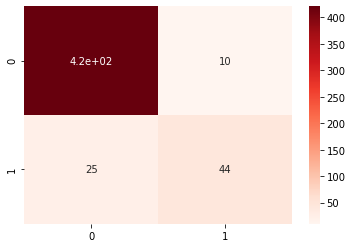

In [20]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
import math
from sklearn import preprocessing

#reading datafile
dataset = pd.read_csv("E:\\ML Zero to Hero\\credit_data(2).csv")

#To overview dataset, simply print the first five rows of data using data.head
print(dataset.head())

#Separating features and target as x and y
dataset.x = dataset[["income", "age", "loan"]]
dataset.y = dataset.default

#Dividing data into train test split
x_train, x_test, y_train, y_test = train_test_split(dataset.x, dataset.y)

#Training the model
model = GaussianNB()
model = model.fit(x_train, y_train)

#Drawing prediction
predictions = model.predict(x_test)

#Finding error matrix and accuracy
EM = confusion_matrix(y_test, predictions)
Acc = accuracy_score(y_test, predictions)

#Printing Error matrix and Accuracy
print("\nError Matrix : \n", EM)
print("\nAccuracy score = ", str(round(Acc * 100)))

#Plotting the error matrix using seaborn
import seaborn as sb
sb.heatmap(confusion_matrix(y_test, predictions), annot = True, cmap = 'Reds')

#------------------------Taking user input to draw predictions according to trained model----------------------#

#Take user input and parse it into float
income = float(input("Enter Income : "))
age = float(input("Enter age : "))
loan = float(input("Enter loan : "))

#Gathering the required features
features_test = [[income, age, loan]]

#Predicting result
predictions = model.predict(features_test)

#Printing appropriate output for user input
if (predictions == 0):
    print("This user is not defaulter.")
elif (predictions == 1):
    print("This user is defaulter.")
